<a href="https://colab.research.google.com/github/AiswaryaSurendran99/lung-cancer-detection/blob/main/Copy_final1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/mini-project

/content/drive/MyDrive/mini-project


In [ ]:
import numpy as np 
import cv2 
import os
import re

# -------------------- Utility function ------------------------
def normalize_label(str_):
    str_ = str_.replace(" ", "")
    str_ = str_.translate(str_.maketrans("","", "()"))
    str_ = str_.split("_")
    return ''.join(str_[:2])

def normalize_desc(folder, sub_folder):
    text = folder + " - " + sub_folder 
    text = re.sub(r'\d+', '', text)
    text = text.replace(".", "")
    text = text.strip()
    return text

def print_progress(val, val_len, folder, sub_folder, filename, bar_size=10):
    progr = "#"*round((val)*bar_size/val_len) + " "*round((val_len - (val))*bar_size/val_len)
    if val == 0:
        print("", end = "\n")
    else:
        print("[%s] folder : %s/%s/ ----> file : %s" % (progr, folder, sub_folder, filename), end="\r")
        

# -------------------- Load Dataset ------------------------
 
dataset_dir = "dataset4" 

imgs = [] #list image matrix 
labels = []
descs = []
for folder in os.listdir(dataset_dir):
    print(folder)
    for sub_folder in os.listdir(os.path.join(dataset_dir, folder)):
        # print(sub_folder)
        sub_folder_files = os.listdir(os.path.join(dataset_dir, folder, sub_folder))
        len_sub_folder = len(sub_folder_files) - 1
        for i, filename in enumerate(sub_folder_files):
            # print(filename)
            img = cv2.imread(os.path.join(dataset_dir, folder, sub_folder, filename))
            
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            h, w = gray.shape
            ymin, ymax, xmin, xmax = h//3, h*2//3, w//3, w*2//3
            crop = gray[ymin:ymax, xmin:xmax]
            
            resize = cv2.resize(crop, (0,0), fx=0.5, fy=0.5)
            
            imgs.append(resize)
            # labels.append(normalize_label(os.path.splitext(filename)[0])) 
            # labels.append(normalize_label(sub_folder))
            labels.append(sub_folder)
            descs.append(normalize_desc(folder, sub_folder))
            
            print_progress(i, len_sub_folder, folder, sub_folder, filename)

Data




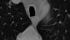

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(imgs[5])

In [ ]:
from skimage.feature import greycomatrix, greycoprops

# ----------------- calculate greycomatrix() & greycoprops() for angle 0, 45, 90, 135 ----------------------------------
def calc_glcm_all_agls(img, label, props, dists=[5], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):
    
    glcm = greycomatrix(img, 
                        distances=dists, 
                        angles=agls, 
                        levels=lvl,
                        symmetric=sym, 
                        normed=norm)
    feature = []
    glcm_props = [propery for name in props for propery in greycoprops(glcm, name)[0]]
    for item in glcm_props:
            feature.append(item)
    feature.append(label) 
    
    return feature


# ----------------- call calc_glcm_all_agls() for all properties ----------------------------------
properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']

glcm_all_agls = []
for img, label in zip(imgs, labels): 
    glcm_all_agls.append(
            calc_glcm_all_agls(img, 
                                label, 
                                props=properties)
                            )
 
columns = []
angles = ['0', '45', '90','135']
for name in properties :
    for ang in angles:
        columns.append(name + "_" + ang)
        
columns.append("label")

In [ ]:
import pandas as pd 

# Create the pandas DataFrame for GLCM features data
glcm_df = pd.DataFrame(glcm_all_agls, 
                      columns = columns)

glcm_df.head(15)

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label
0,22.285538,23.007905,21.665714,24.589262,0.698635,0.712123,0.744608,0.671170,0.106366,0.087689,...,1465.250659,0.000623,0.000563,0.000636,0.000537,0.024955,0.023721,0.025213,0.023163,cancer
1,23.693182,25.660503,22.648972,23.272436,0.713296,0.668510,0.744487,0.736710,0.100429,0.100720,...,1208.951923,0.000521,0.000552,0.000638,0.000540,0.022834,0.023503,0.025261,0.023238,cancer
2,24.821978,23.143541,17.089575,21.836922,0.588497,0.619129,0.775818,0.660166,0.101333,0.103000,...,1241.220494,0.000738,0.000757,0.000858,0.000768,0.027167,0.027506,0.029285,0.027706,cancer
3,19.281734,21.015517,16.161290,16.500575,0.584263,0.547690,0.748178,0.685784,0.203601,0.176492,...,932.481034,0.005048,0.004791,0.004765,0.005135,0.071047,0.069214,0.069026,0.071658,cancer
4,22.902692,24.137626,19.837959,20.556818,0.622055,0.553124,0.677499,0.653249,0.111446,0.116844,...,1109.747896,0.000985,0.001102,0.001268,0.001216,0.031384,0.033199,0.035611,0.034872,cancer
5,24.786538,25.030724,20.281224,22.868687,0.531481,0.483906,0.615298,0.572397,0.101629,0.099256,...,1345.041246,0.000963,0.001014,0.001200,0.000994,0.031040,0.031841,0.034647,0.031521,cancer
6,27.316176,28.697665,27.457926,28.822061,0.481601,0.442326,0.511099,0.420337,0.091268,0.074702,...,1863.393720,0.000648,0.000592,0.000542,0.000601,0.025451,0.024335,0.023290,0.024506,cancer
7,26.516908,24.019345,18.266499,24.391369,0.558139,0.597211,0.755601,0.618938,0.078700,0.088813,...,1363.049107,0.000593,0.000641,0.000710,0.000610,0.024356,0.025315,0.026644,0.024695,cancer
8,25.273459,22.246758,18.448723,23.249809,0.666028,0.702248,0.791882,0.692242,0.105214,0.112806,...,1465.794432,0.001032,0.001223,0.001384,0.001223,0.032120,0.034971,0.037208,0.034972,cancer
9,21.168103,22.082435,18.490587,20.505778,0.560291,0.518817,0.650684,0.557271,0.147950,0.120320,...,1421.031202,0.001383,0.001197,0.001241,0.001359,0.037186,0.034601,0.035234,0.036870,cancer


In [ ]:
for idx,x in enumerate(sorted(glcm_df["label"].unique())):
  print(idx,':',x)

0 : cancer
1 : normal


In [ ]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
glcm_df["label"] = label_encoder.fit_transform(glcm_df['label'])

In [ ]:
glcm_df

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label
0,22.285538,23.007905,21.665714,24.589262,0.698635,0.712123,0.744608,0.671170,0.106366,0.087689,...,1465.250659,0.000623,0.000563,0.000636,0.000537,0.024955,0.023721,0.025213,0.023163,0
1,23.693182,25.660503,22.648972,23.272436,0.713296,0.668510,0.744487,0.736710,0.100429,0.100720,...,1208.951923,0.000521,0.000552,0.000638,0.000540,0.022834,0.023503,0.025261,0.023238,0
2,24.821978,23.143541,17.089575,21.836922,0.588497,0.619129,0.775818,0.660166,0.101333,0.103000,...,1241.220494,0.000738,0.000757,0.000858,0.000768,0.027167,0.027506,0.029285,0.027706,0
3,19.281734,21.015517,16.161290,16.500575,0.584263,0.547690,0.748178,0.685784,0.203601,0.176492,...,932.481034,0.005048,0.004791,0.004765,0.005135,0.071047,0.069214,0.069026,0.071658,0
4,22.902692,24.137626,19.837959,20.556818,0.622055,0.553124,0.677499,0.653249,0.111446,0.116844,...,1109.747896,0.000985,0.001102,0.001268,0.001216,0.031384,0.033199,0.035611,0.034872,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,31.730055,37.559620,30.425344,31.194412,0.633917,0.513614,0.662523,0.639313,0.169084,0.146900,...,3011.534850,0.002890,0.002511,0.002686,0.002864,0.053757,0.050111,0.051831,0.053512,1
315,58.721691,50.320934,38.358852,55.429066,0.312101,0.446098,0.639213,0.365858,0.079628,0.102924,...,6601.750865,0.001352,0.002526,0.001978,0.001142,0.036774,0.050259,0.044475,0.033792,1
316,25.311226,25.782867,22.464829,23.520821,0.668338,0.654754,0.726488,0.704229,0.096578,0.096405,...,1757.747174,0.000576,0.000586,0.000614,0.000605,0.023991,0.024211,0.024770,0.024594,1
317,31.124175,32.060827,29.226960,31.942148,0.529919,0.489729,0.586741,0.500435,0.081145,0.074943,...,2439.069750,0.000364,0.000352,0.000366,0.000358,0.019068,0.018750,0.019137,0.018913,1


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 319 samples in 0.000s...
[t-SNE] Computed neighbors for 319 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 319 / 319
[t-SNE] Mean sigma: 335.409120
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.778660
[t-SNE] KL divergence after 1000 iterations: 0.151480


[Text(0.5, 1.0, 'Data T-SNE projection')]

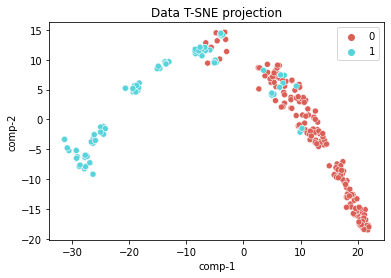

In [ ]:
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns

x = glcm_df.iloc[:,:-1]
y = glcm_df.iloc[:,-1]

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x) 

df2 = pd.DataFrame()
df2["y"] = y
df2["comp-1"] = z[:,0]
df2["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df2.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df2).set(title="Data T-SNE projection") 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
train, test = train_test_split(glcm_df, test_size = 0.3)
trainX = train.iloc[:,:-1]# taking the training data features
trainY=train.iloc[:,-1]# output of our training data
# trainY=trainY.astype('int')
testX= test.iloc[:,:-1] # taking test data features
testY =test.iloc[:,-1]   #output value of test data

trainX.head(5)

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,contrast_90,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135
299,26.331148,26.258065,23.829545,28.384736,0.746465,0.771838,0.803214,0.722545,0.150154,0.145655,...,1840.298485,2556.120378,0.001934,0.001858,0.001854,0.001710,0.043979,0.043106,0.043054,0.041354
254,20.700760,20.344354,19.818727,21.836582,0.562793,0.558159,0.581114,0.506019,0.156106,0.158092,...,1582.949257,1816.332933,0.002540,0.002557,0.002524,0.002516,0.050402,0.050571,0.050244,0.050162
289,26.563462,31.850000,30.623665,29.821782,0.756361,0.665917,0.681820,0.688793,0.208026,0.186063,...,2911.746898,2812.374059,0.018744,0.014119,0.017403,0.016096,0.136910,0.118823,0.131921,0.126868
73,15.432770,14.858874,12.137247,15.107792,0.543647,0.538101,0.653310,0.537548,0.187133,0.193019,...,591.078131,785.680087,0.003569,0.003810,0.004079,0.003648,0.059738,0.061728,0.063868,0.060395
282,36.825378,37.632840,35.890085,37.843199,0.500685,0.504628,0.557489,0.486100,0.070400,0.071409,...,3902.648034,4373.806554,0.000594,0.000575,0.000574,0.000586,0.024362,0.023970,0.023954,0.024213


In [ ]:
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='rbf', C=C,gamma='auto', random_state=0).fit(trainX,trainY)

In [ ]:
predY = svc.predict(testX)

In [ ]:
print(list(testY))
print(list(predY))

[0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1]
[0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1]


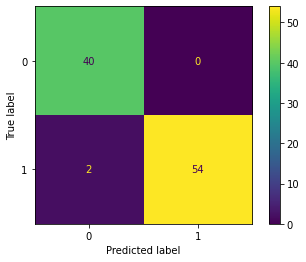

In [ ]:
cm= confusion_matrix(testY, predY)
# plot_confusion_matrix(cm,display_labels=['Low','Medium','High'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0,1])

cm_display.plot()
plt.show()

In [ ]:
print('Accuracy of the SVM Classifier is:',metrics.accuracy_score(predY,testY))

Accuracy of the SVM Classifier is: 0.9791666666666666


In [ ]:
import pickle
filename = 'svm_model.sav'
pickle.dump(svc, open(filename, 'wb'))

# **Prediction**

In [ ]:
imgs = [] #list image matrix 
descs = []

img = cv2.imread('/content/drive/MyDrive/mini-project/dataset4/Data/normal/10 - Copy (2).png')
            
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

h, w = gray.shape
ymin, ymax, xmin, xmax = h//3, h*2//3, w//3, w*2//3
crop = gray[ymin:ymax, xmin:xmax]

resize = cv2.resize(crop, (0,0), fx=0.5, fy=0.5)

imgs.append(resize)



In [ ]:
properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']

glcm_all_agls = []
glcm_all_agls.append(calc_glcm_all_agls(imgs[0], label, props=properties))
 
columns = []
angles = ['0', '45', '90','135']
for name in properties :
    for ang in angles:
        columns.append(name + "_" + ang)
        
        

In [ ]:
glcm_df = pd.DataFrame([glcm_all_agls[0][:-1]], columns = columns)

glcm_df

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,contrast_90,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135
0,39.063492,36.229583,29.409765,37.122051,0.482102,0.54457,0.655853,0.524688,0.101514,0.108551,...,2717.513514,3848.290835,0.00096,0.001039,0.001154,0.000962,0.030982,0.032232,0.033971,0.031014


In [ ]:
predY = svc.predict(glcm_df)

In [ ]:
predY

array([1])